In [207]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#palette='gist_heat'
palette=["#8282ff", "#4746e0"]
colors = ['#6e2c00','#d35400','#a04000','#e59866','#fbeee6','#fef9e7']
plt.rcParams['font.family'] = "serif"

In [208]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from category_encoders.binary import BinaryEncoder
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import KMeansSMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn import set_config
set_config(display='diagram')

In [209]:
data = pd.read_csv("train_ctrUa4K.csv")
df=data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [211]:
df.drop(columns=['Loan_ID'],inplace=True)

In [212]:
(df.isnull().sum()*100)/len(df)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [213]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [215]:
numerical_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
categorical_col= ['Loan_Amount_Term','Credit_History','Property_Area','Married','Dependents','Gender','Self_Employed','Education']

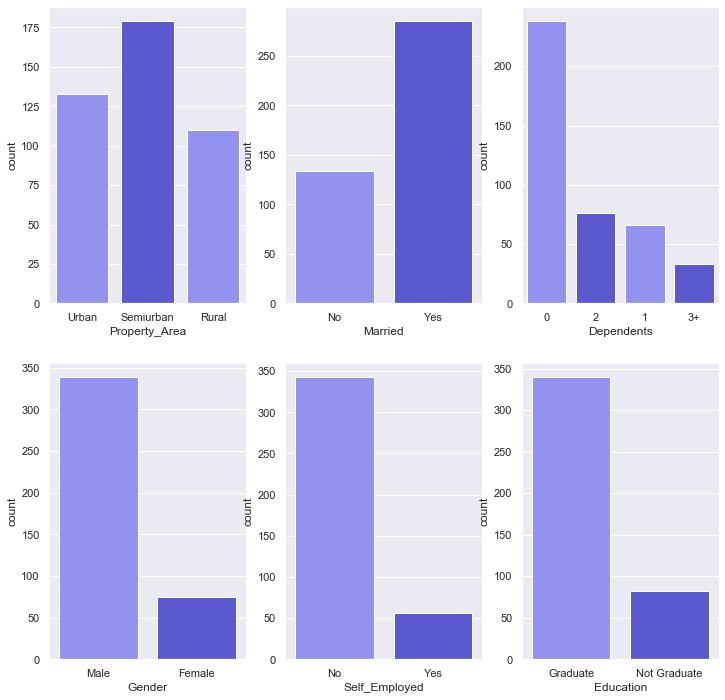

In [191]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (12, 12))
index = 0

axs = axs.flatten()
for col in ['Property_Area','Married','Dependents','Gender','Self_Employed','Education']:
    sns.countplot(data=df[df['Loan_Status']=='Y'],x=col ,palette=palette, ax = axs[index])
    index += 1

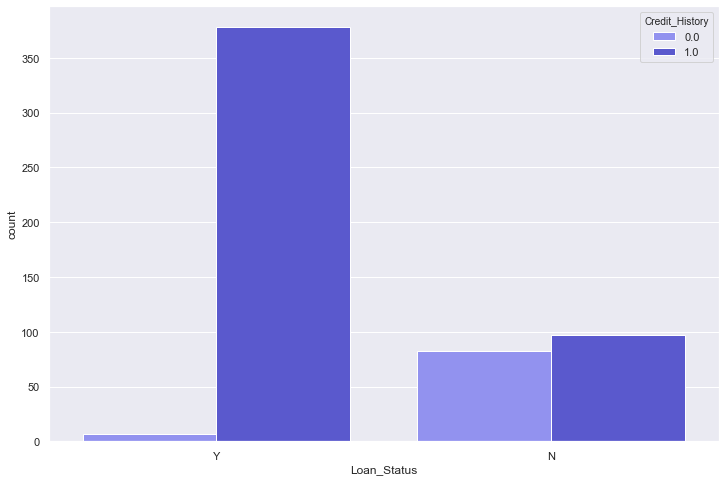

In [192]:
sns.countplot(data=data,x='Loan_Status',hue='Credit_History' ,palette=palette)

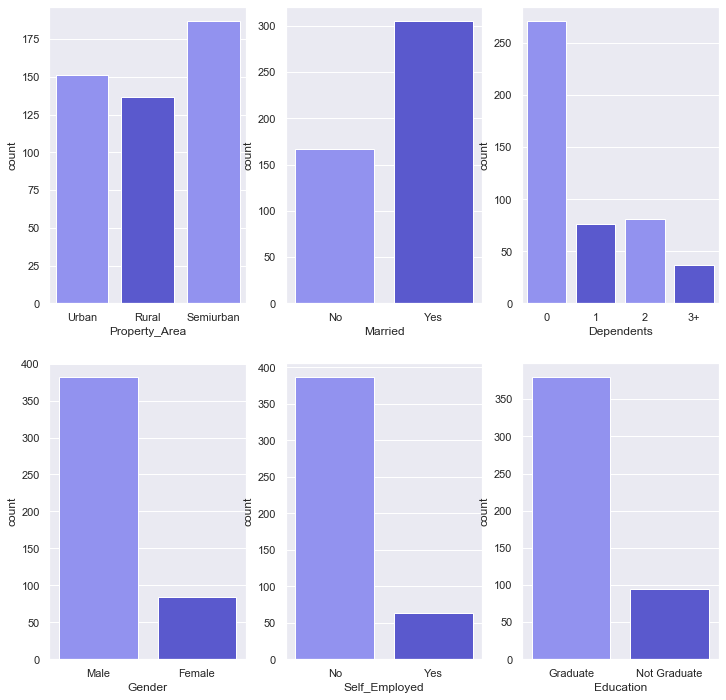

In [193]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (12, 12))
index = 0

axs = axs.flatten()
for col in ['Property_Area','Married','Dependents','Gender','Self_Employed','Education']:
    sns.countplot(data=df[df['Credit_History']==1.0],x=col ,palette=palette, ax = axs[index])
    index += 1

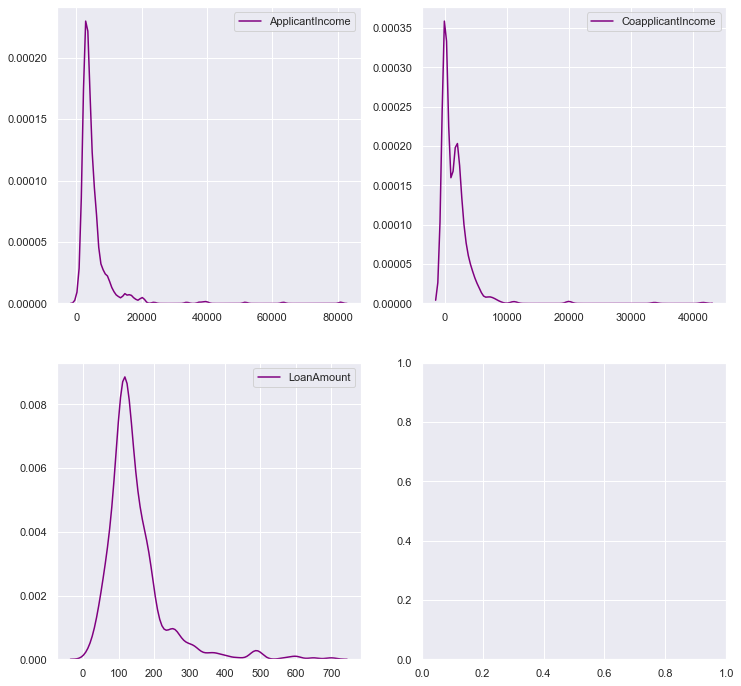

In [194]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.kdeplot(data=data['ApplicantIncome'], ax=axs[0, 0],color='purple')
sns.kdeplot(data=data['CoapplicantIncome'], ax=axs[0, 1],color='purple')
sns.kdeplot(data=data["LoanAmount"], ax=axs[1, 0],color='purple')

1    69.459963
0    30.540037
Name: Loan_Status, dtype: float64

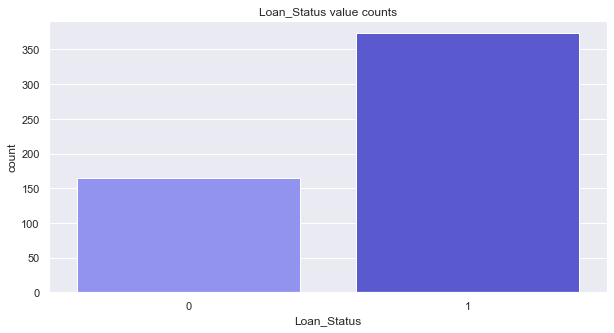

In [199]:
plt.figure(figsize=(10,5))
plt.title('Loan_Status value counts')
sns.countplot(x=df['Loan_Status'],palette=palette);
df['Loan_Status'].value_counts() * 100 / len(df)

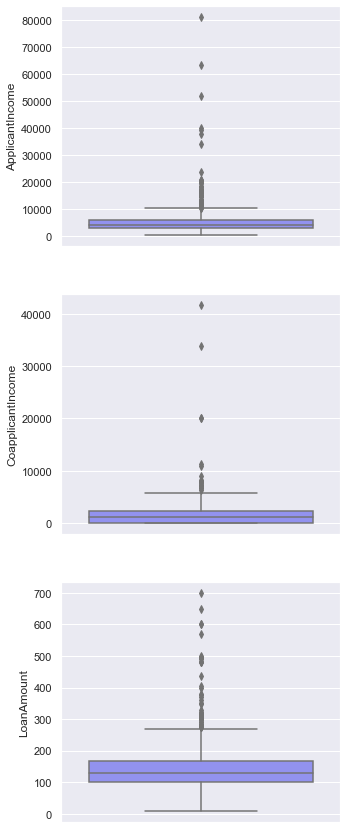

In [195]:
fig, axs = plt.subplots(ncols = 1, nrows = 3, figsize = (5, 15))
index = 0

axs = axs.flatten()
for col in numerical_col:
    sns.boxplot(y=df[col], ax = axs[index],palette=palette)
    index += 1

In [196]:
# one or more
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1
df.shape
df = df[~((df[numerical_col] < (Q1 - 1.5 * IQR)) |(df[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.reset_index(drop=True, inplace=True)
df.shape

(537, 12)

In [197]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

In [198]:
from sklearn.svm import SVC
smt = KMeansSMOTE(k_neighbors=5,n_jobs=-1)
num_pipeline = Pipeline(steps=[
    ('impute', KNNImputer()),
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ("OHE" , OneHotEncoder(sparse=False , drop="first")),
])
Encoder = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']),
    ('cat_pipeline',cat_pipeline,["Gender" , "Married" , "Dependents","Education" , "Self_Employed" , "Property_Area",'Credit_History'] ),],remainder='passthrough')
select_from_model = SelectFromModel(RandomForestClassifier(), threshold='mean')
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("SVC 'linear kernel'" ,SVC(kernel='linear')))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("EXT" , ExtraTreesClassifier()))

for model in models:
    steps = list()
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(("SelectFromModel" , select_from_model))
#    steps.append(("smt" , smt))
    steps.append(model)
    clf_pipeline = Pipeline(steps=steps)
    scores = cross_validate(clf_pipeline , x , y , scoring="accuracy"  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")

LR
Train_accuracy 0.8212338049547352
----------
Test_accuracy 0.8213049498096228
--------------------


SVC 'linear kernel'
Train_accuracy 0.8212338049547352
----------
Test_accuracy 0.8213049498096228
--------------------


CART
Train_accuracy 1.0
----------
Test_accuracy 0.7169262720664591
--------------------


RF
Train_accuracy 1.0
----------
Test_accuracy 0.7951886465905158
--------------------


EXT
Train_accuracy 1.0
----------
Test_accuracy 0.7877812391831084
--------------------




In [200]:
from sklearn.model_selection import GridSearchCV
params = [
        {'Model__penalty':['l2','none'], 'Model__C': [1, 0.1], 'Model__solver': ['newton-cg', 'lbfgs']}
         ]
steps = list()
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("SelectFromModel" , select_from_model))
steps.append(("Model" , LogisticRegression()))
pipeline = Pipeline(steps = steps)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10,return_train_score=True, n_jobs=-1)
grid_search.fit(x, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('OHE',
                                                                                          OneHotEncoder(dro...
                                                                          'Self_Employed',
                                                                          'Property_Area',
                                                                          'Credit_History'])])),
                                       ('Scaler', RobustScaler()),
                                       ('SelectFromModel',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        threshold='mean')),
                                       ('Model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'Model__C': [1, 0.1],
                          'Model__penalty': ['l2', 'none'],
                          'Model__solver': ['newton-cg', 'lbfgs']}],
             return_train_score=True, scoring='accuracy')

In [201]:
grid_search.cv_results_["mean_test_score"].mean()

0.8213836477987421

In [202]:
import joblib
final_model = grid_search.best_estimator_
inputs = x.columns
joblib.dump(final_model , "Model.pkl")
joblib.dump( inputs , "Inputs.pkl" )

['Inputs.pkl']

In [203]:
%%writefile app.py
import streamlit as st
import joblib 
import pandas as pd

Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")
data = pd.read_csv("train_ctrUa4K.csv")
data.drop(columns=['Loan_ID','Loan_Status'],inplace=True)
def predict(gender, married, dependents, education, self_employed,applicant_income, coapplicant_income, loanamount,loan_amount_term,credit_history,property_area):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,"Gender"] = gender
    test_df.at[0,"Married"] = married
    test_df.at[0,"Dependents"] = dependents
    test_df.at[0,"Education"] = education
    test_df.at[0,"Self_Employed"] = self_employed
    test_df.at[0,"ApplicantIncome"] = int(applicant_income)
    test_df.at[0,"CoapplicantIncome"] = float(coapplicant_income)
    test_df.at[0,"LoanAmount"] = float(loanamount)
    test_df.at[0,"Loan_Amount_Term"] = float(loan_amount_term)
    test_df.at[0,"Credit_History"] = float(credit_history)
    test_df.at[0,"Property_Area"] = str(property_area)
    return Model.predict(test_df)[0]

def main():
    st.title("Zomato Resturants App")
    gender = st.selectbox("Gender" , ['Male', 'Female'])
    married = st.selectbox("Married" , ['Yes', 'No'])
    dependents = st.selectbox("Dependents" , ['0', '1','2','3+'])
    education = st.selectbox("Education" , ['Graduate', 'Not Graduate'])
    self_employed = st.selectbox("Self Employed" , ['Yes', 'No'])
    applicant_income = st.slider("ApplicantIncome" , min_value=50, max_value=5000, value=0, step=1)
    coapplicant_income = st.slider("CoapplicantIncome" , min_value=50, max_value=5000, value=0, step=1)
    loanamount = st.slider("LoanAmount" , min_value=9, max_value=700, value=0, step=1)
    loan_amount_term = st.selectbox("Loan Amount Term" , ['12.0', '36.0','60.0','84.0','120.0','180.0','240.0','300.0','480.0','360.0'])#float
    credit_history = st.selectbox("Credit History" , ['0.0', '1.0'])#float
    property_area = st.selectbox("Property Area" , ['Urban', 'Semiurban','Rural'])
    if st.button("Predict"):
        result = predict(gender, married, dependents, education, self_employed,applicant_income, coapplicant_income, loanamount,loan_amount_term,credit_history,property_area)
        label = ["Fail","Success"]
        st.text("The output is {}".format(label[result]))
if __name__ == '__main__':
    main()

Overwriting app.py
